### 골빈해커의 3분 딥러닝
#### 6장 헬로 딥러닝 MNIST

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [19]:
# 모델 구성 (1) - dropout 미적용

X = tf.placeholder(tf.float32, [None, 784]) # 28 * 28  = 784, None에는 MNIST 이미지 개수 지정 (즉, 배치 크기 지정 => None으로 두면 알아서)
Y = tf.placeholder(tf.float32, [None, 10])

with tf.name_scope('layer1'):
    W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
    L1 = tf.nn.relu(tf.matmul(X, W1))

with tf.name_scope('layer2'):
    W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
    L2 = tf.nn.relu(tf.matmul(L1, W2))

with tf.name_scope('layer3'):
    W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
    model = tf.matmul(L2, W3)
    
with tf.name_scope('optimizer'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = model))

    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)
    
    

In [16]:
# 모델 구성 (2) - dropout 적용

X = tf.placeholder(tf.float32, [None, 784]) # 28 * 28  = 784, None에는 MNIST 이미지 개수 지정 (즉, 배치 크기 지정 => None으로 두면 알아서)
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

with tf.name_scope('layer1'):
    W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
    L1 = tf.nn.relu(tf.matmul(X, W1))
    L1 = tf.nn.dropout(L1, keep_prob)

with tf.name_scope('layer2'):
    W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
    L2 = tf.nn.relu(tf.matmul(L1, W2))
    L2 = tf.nn.dropout(L2, keep_prob)

with tf.name_scope('layer3'):
    W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
    model = tf.matmul(L2, W3)
    
with tf.name_scope('optimizer'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = model))

    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)
    

In [20]:
# 모델 학습 (1)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict = {X: batch_xs, Y: batch_ys})
        total_cost += cost_val
        
    print('Epoch: ', '%04d' % (epoch + 1),
          'Avg.cost =', '{:3f}'.format(total_cost / total_batch))

print('최적화 완료')

Epoch:  0001 Avg.cost = 0.409965
Epoch:  0002 Avg.cost = 0.148206
Epoch:  0003 Avg.cost = 0.095985
Epoch:  0004 Avg.cost = 0.069375
Epoch:  0005 Avg.cost = 0.052475
Epoch:  0006 Avg.cost = 0.040384
Epoch:  0007 Avg.cost = 0.032208
Epoch:  0008 Avg.cost = 0.025073
Epoch:  0009 Avg.cost = 0.023347
Epoch:  0010 Avg.cost = 0.017776
Epoch:  0011 Avg.cost = 0.014433
Epoch:  0012 Avg.cost = 0.013924
Epoch:  0013 Avg.cost = 0.013267
Epoch:  0014 Avg.cost = 0.011147
Epoch:  0015 Avg.cost = 0.011174
Epoch:  0016 Avg.cost = 0.010615
Epoch:  0017 Avg.cost = 0.010729
Epoch:  0018 Avg.cost = 0.007722
Epoch:  0019 Avg.cost = 0.008726
Epoch:  0020 Avg.cost = 0.007890
Epoch:  0021 Avg.cost = 0.009463
Epoch:  0022 Avg.cost = 0.005623
Epoch:  0023 Avg.cost = 0.007924
Epoch:  0024 Avg.cost = 0.007043
Epoch:  0025 Avg.cost = 0.005582
Epoch:  0026 Avg.cost = 0.006259
Epoch:  0027 Avg.cost = 0.006933
Epoch:  0028 Avg.cost = 0.003995
Epoch:  0029 Avg.cost = 0.008203
Epoch:  0030 Avg.cost = 0.004994
최적화 완료


In [17]:
# 모델 학습 (2)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
    
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter('./logs', sess.graph)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val

        
    print('Epoch: ', '%04d' % (epoch + 1),
          'Avg.cost =', '{:3f}'.format(total_cost / total_batch))

print('최적화 완료')

Epoch:  0001 Avg.cost = 0.433048
Epoch:  0002 Avg.cost = 0.167822
Epoch:  0003 Avg.cost = 0.116428
Epoch:  0004 Avg.cost = 0.090071
Epoch:  0005 Avg.cost = 0.073550
Epoch:  0006 Avg.cost = 0.061780
Epoch:  0007 Avg.cost = 0.052280
Epoch:  0008 Avg.cost = 0.045776
Epoch:  0009 Avg.cost = 0.039689
Epoch:  0010 Avg.cost = 0.037659
Epoch:  0011 Avg.cost = 0.035005
Epoch:  0012 Avg.cost = 0.029920
Epoch:  0013 Avg.cost = 0.028620
Epoch:  0014 Avg.cost = 0.026793
Epoch:  0015 Avg.cost = 0.025414
Epoch:  0016 Avg.cost = 0.024552
Epoch:  0017 Avg.cost = 0.023967
Epoch:  0018 Avg.cost = 0.022062
Epoch:  0019 Avg.cost = 0.021137
Epoch:  0020 Avg.cost = 0.019273
Epoch:  0021 Avg.cost = 0.018854
Epoch:  0022 Avg.cost = 0.018765
Epoch:  0023 Avg.cost = 0.018453
Epoch:  0024 Avg.cost = 0.017761
Epoch:  0025 Avg.cost = 0.016627
Epoch:  0026 Avg.cost = 0.018289
Epoch:  0027 Avg.cost = 0.016867
Epoch:  0028 Avg.cost = 0.015894
Epoch:  0029 Avg.cost = 0.014716
Epoch:  0030 Avg.cost = 0.015899
최적화 완료


In [21]:
# 결과 확인 (1)
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.3f' % sess.run(accuracy, feed_dict= {X: mnist.test.images, 
                                                      Y: mnist.test.labels}))

정확도: 0.978


In [18]:
# 결과 확인 (2)
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.3f' % sess.run(accuracy, feed_dict= {X: mnist.test.images, 
                                                      Y: mnist.test.labels,
                                                      keep_prob: 1}))

정확도: 0.982


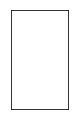

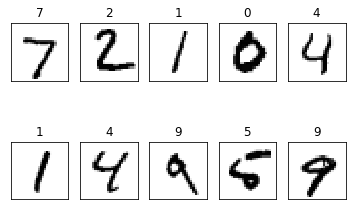

In [25]:
# 결과 확인 (3) matplotlib 적용
labels = sess.run(model, feed_dict = {X: mnist.test.images,
                                      Y: mnist.test.labels,
                                      keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    
plt.show()